In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 12, 10

In [3]:
x = np.array([i*np.pi/180 for i in range(60, 300,4)])

In [4]:
np.random.seed(10)

In [5]:
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

In [6]:
import pandas as pd

In [7]:
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])

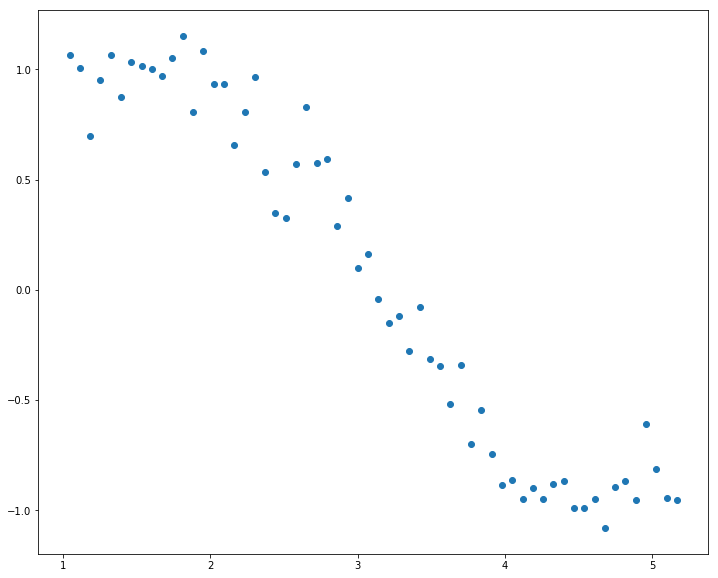

In [8]:
plt.scatter(data['x'], data['y'])

In [9]:
for i in range(2,16):
    colname = 'x_'+str(i)
    data[colname] = data['x']**i

In [10]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [11]:
from sklearn.linear_model import LinearRegression

In [44]:
def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_'+str(i) for i in range(2, power+1)])
    
    lin_reg = LinearRegression(normalize=True)
    lin_reg.fit(data[predictors],data['y'])
    y_pred = lin_reg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power '+str(power))
    
    rss = sum((y_pred - data['y'])**2)
    ret = [rss, lin_reg.intercept_, *lin_reg.coef_]
#     print(ret)
    return ret

In [42]:
plt.style.use('ggplot')

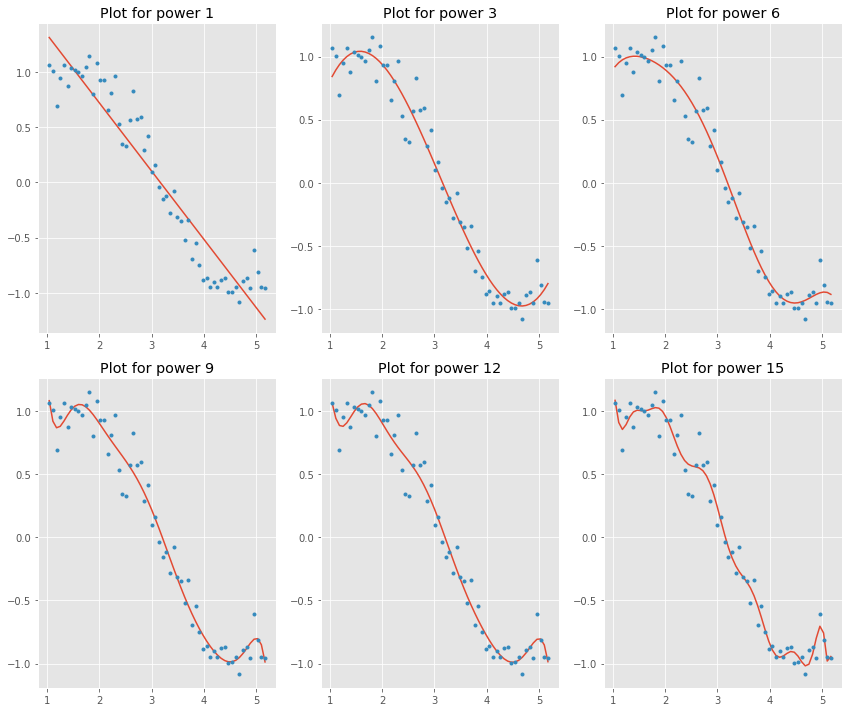

In [45]:
col = ['rss', 'intercept'] + ['coef_x_'+str(i) for i in range(1,16)]
ind = ['model_pow_'+str(i) for i in range(1,16)]
coef_mat = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

for i in range(1,16):
    coef_mat.iloc[i-1, 0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [46]:
coef_mat

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.28032,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.27668,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.10335,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.07858,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.01857,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.990074,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.928265,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91761,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.874941,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.874578,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN


In [64]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot):
    ridge_reg = Ridge(alpha=alpha, normalize=True)
    ridge_reg.fit(data[predictors], data['y'])
    y_pred = ridge_reg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'],'.')
        plt.title('Plot for alpha '+str(alpha))
        
    rss = sum((y_pred - data['y'])**2)
    return [rss, ridge_reg.intercept_, *ridge_reg.coef_]

c:\users\ravi.vasant.naik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.816092e-17
  overwrite_a=True).T


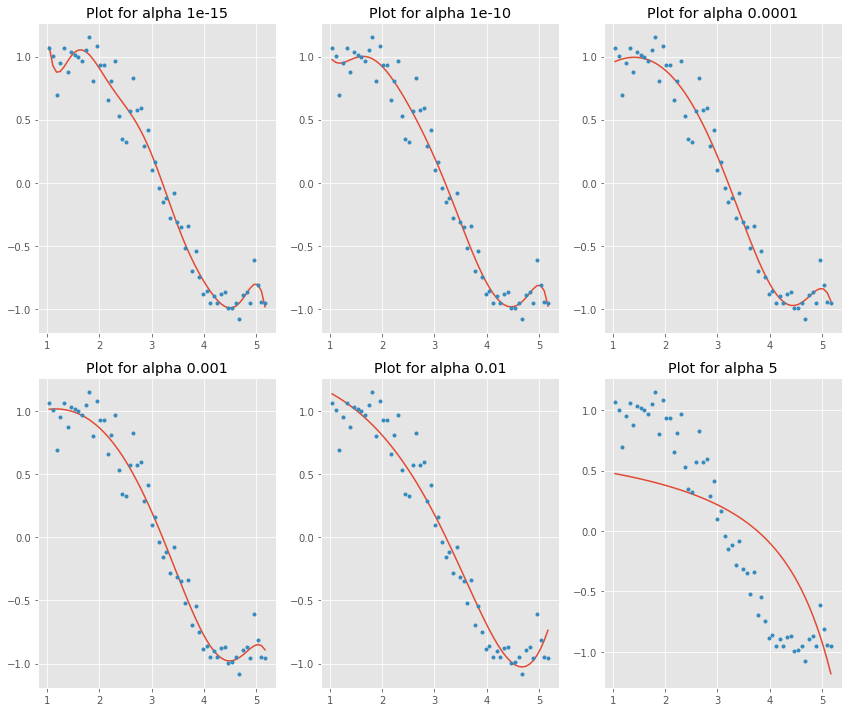

In [65]:
predictors = ['x',*['x_'+str(i) for i in range(2,16)]]

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['rss', 'intercept', *['coef_x_'+str(i) for i in range(1,16)]]
ind = ['alpha_'+str(alpha_ridge[i]) for i in range(10)]
coef_mat_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
    coef_mat_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [66]:
coef_mat_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.873106,94.3086,-298.286,378.345,-236.477,67.7631,-1.17314,-3.69304,0.304958,0.189058,-0.0214981,-0.00767798,0.00105963,0.000246367,-6.34577e-05,4.6091e-06,-9.00559e-08
alpha_1e-10,0.922601,11.1701,-28.9629,31.0694,-15.2353,2.89182,0.169364,-0.0910019,-0.0108383,0.00198378,0.00063697,2.40845e-05,-2.00113e-05,-4.2037e-06,2.19352e-07,2.2729e-07,-2.33741e-08
alpha_1e-08,0.949292,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
alpha_0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
alpha_0.001,1.00178,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
alpha_0.01,1.43579,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
alpha_1,5.64874,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
alpha_5,13.8383,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
alpha_10,18.0248,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
alpha_20,22.7205,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13


In [68]:
from sklearn.linear_model import Lasso

In [87]:
def lasso_regression(data, alpha, predictors, maodels_to_plot):
    lasso_reg = Lasso(alpha=alpha, normalize=True, max_iter=1e3)
    lasso_reg.fit(data[predictors], data['y'])
    y_pred = lasso_reg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title(r'$\alpha$: '+str(alpha))
    
    rss = sum((data['y'] - y_pred)**2)
    return [rss, lasso_reg.intercept_, *lasso_reg.coef_]

c:\users\ravi.vasant.naik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


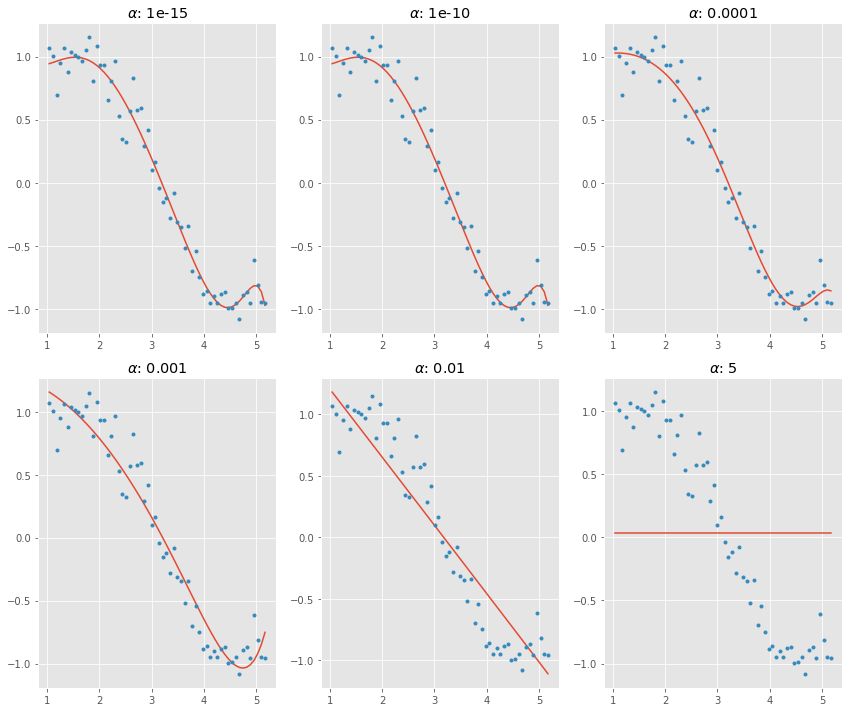

In [86]:
predictors = ['x',*['x_'+str(i) for i in range(2,16)]]

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['rss', 'intercept', *['coef_x_'+str(i) for i in range(1,16)]]
ind = ['alpha_'+str(alpha_lasso[i]) for i in range(10)]
coef_mat_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
    coef_mat_lasso.iloc[i,] = lasso_regression(data, alpha_lasso[i], predictors, models_to_plot)

In [84]:
coef_mat_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.956715,0.222238,1.06464,-0.369048,0.000885176,0.00163313,-0.000118539,-6.43874e-05,-6.27554e-06,1.44874e-06,7.82079e-07,2.0758e-07,3.98135e-08,5.35996e-09,1.81973e-10,-1.9545e-10,-9.23654e-11
alpha_1e-10,0.956715,0.222239,1.06463,-0.369044,0.000884005,0.00163297,-0.000118453,-6.43884e-05,-6.27604e-06,1.44856e-06,7.82087e-07,2.07577e-07,3.98123e-08,5.35972e-09,1.82126e-10,-1.95439e-10,-9.23689e-11
alpha_1e-08,0.956708,0.222374,1.06416,-0.368607,0.000768994,0.00161624,-0.000109896,-6.44771e-05,-6.32441e-06,1.43063e-06,7.83012e-07,2.07335e-07,3.96964e-08,5.33557e-09,1.96e-10,-1.94185e-10,-9.2727e-11
alpha_0.0001,1.03263,0.903041,0.1711,-0,-0.0477801,-0,-0,0,0,9.46534e-06,5.09953e-07,0,0,0,-0,-0,-4.40439e-11
alpha_0.001,1.67883,1.29462,-0,-0.126087,-0,-0,-0,0,0,0,0,0,1.49606e-08,7.52631e-10,0,0,0
alpha_0.01,3.63907,1.75938,-0.552066,-0.000562323,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_20,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
